In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

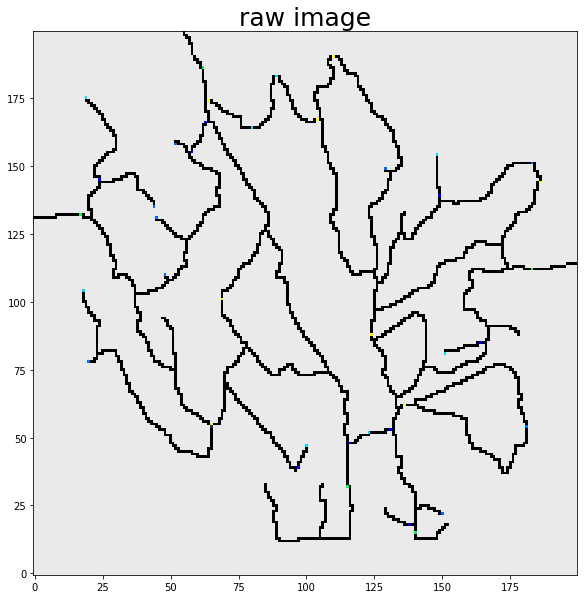

In [2]:
#load image
plt.figure(figsize=(20,10))
img=cv2.imread("data/Map.bmp")
img = cv2.flip(img, 0) #flip the image

plt.imshow(img,origin='lower')
plt.title('raw image',fontsize = 25)
plt.show()

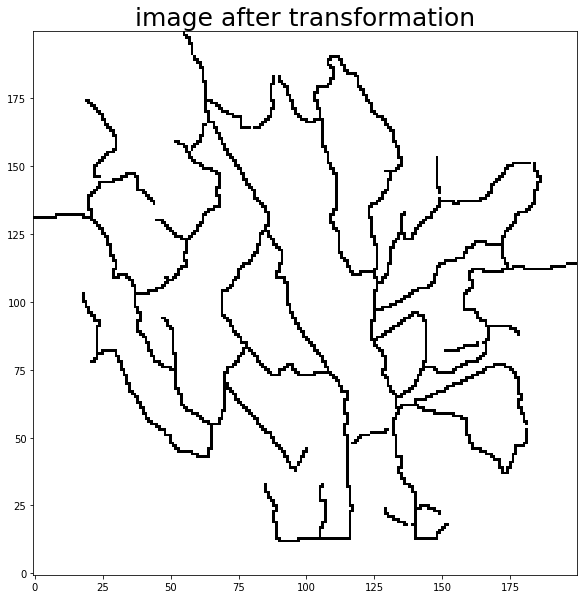

In [3]:
#transformation
img2=img.copy()
img2[np.where(img2[:,:,2]>230)]=[255,255,255]
img2[np.where(img2[:,:,2]<230)]=[0,0,0]

plt.figure(figsize=(20,10))
plt.imshow(img2, origin = 'lower')
plt.title('image after transformation',fontsize = 25)
plt.show()

In [4]:
#load bird position
df = pd.read_csv('data/AllBirdsv4.csv',encoding='ISO-8859-1')

position = []
for i in range(df.shape[0]):
    try:
        position.append([int(df.X[i]), int(df.Y[i])])
    except:
        pass

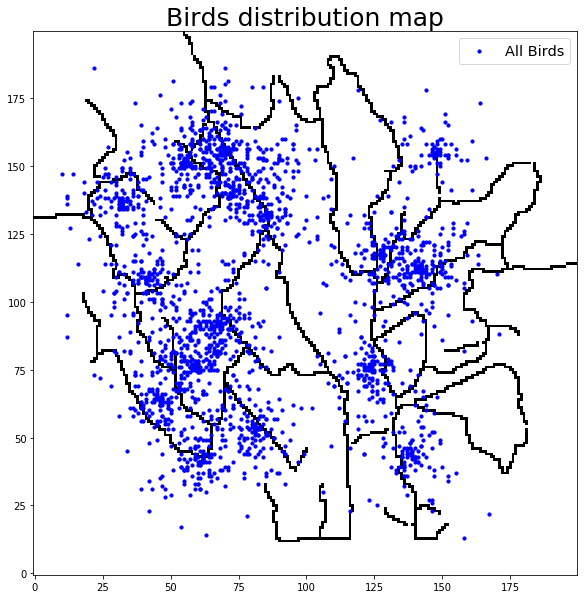

In [5]:
plt.figure(figsize=(20,10))
for i in position:
    plt.scatter(i[0], i[1], s=10, c = 'blue', marker = 'o',label = 'All Birds' if i == position[0] else "")
plt.imshow(img2, origin = 'lower')
plt.title('Birds distribution map',fontsize = 25)
plt.legend(loc =1, fontsize = 'x-large')
plt.show()

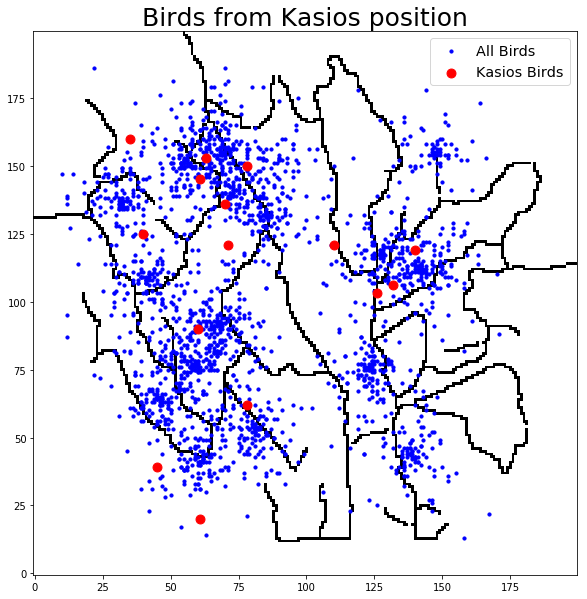

In [6]:
#Birds from Kasios

kasios = pd.read_csv('data/Test Birds Location.csv',encoding='ISO-8859-1')
kasios.columns = kasios.columns.str.lstrip() #remove space in label

plt.figure(figsize=(20,10))
for i in position:
    plt.scatter(i[0], i[1], s=10, c = 'blue', marker = 'o',label = 'All Birds' if i == position[0] else "")
for i in range(15):
    plt.scatter(kasios.X[i], kasios.Y[i], s=80, c = 'red', marker = 'o',label = 'Kasios Birds' if i == 0 else "")
plt.imshow(img2, origin = 'lower')
plt.title('Birds from Kasios position',fontsize = 25)
plt.legend(loc =1, fontsize = 'x-large')
plt.show()